In [1]:
# package
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import seasonal_plot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot

from numpy import sqrt
from datetime import datetime, timedelta,date
from sklearn.metrics import mean_squared_error
#importing machine learning libraries
import pickle
import gc # to free some space from the memory
from sklearn.model_selection import KFold

import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore")

#importing regressors
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from xgboost import plot_importance
from lightgbm import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
import re

from sklearn.feature_selection import SelectFromModel

In [2]:
df1 = pd.read_csv(r"\\setrust.local\SetrustDocs\UserDocsV\Vinu.Vanathayan\Desktop\OneDrive_2023-07-20 (1)\Vinu HSC working file\working data\WinterPressuresSource.csv")

# removing 1st row(blank row) and droping the missing DOI from the data set found 61 missing.
df1 = df1.drop(index=0)
df1 = df1.dropna(subset=["Date of Incident"])

In [8]:
df = df1.copy()
df = df.fillna('') # Replace NaN with blank

In [9]:
import re
import pandas as pd

def detect_date_format(date_str):
    formats = [
        r'\d{2}/\d{2}/\d{4}',  # dd/mm/yyyy
        r'\d{4}/\d{2}/\d{2}',  # yyyy/mm/dd
        r'\d{4}-\d{2}-\d{2}',  # yyyy-mm-dd
        r'\d{2}-\d{2}-\d{4}'   # dd-mm-yyyy
    ]
    for format_str in formats:
        if re.match(format_str, date_str):
            return format_str
    return None

def convert_date_format(date_str):
    detected_format = detect_date_format(date_str)
    if detected_format:
        if '/' in detected_format:
            parts = date_str.split('/')
        else:
            parts = date_str.split('-')
        if len(parts[0]) == 4:  # yyyy/mm/dd format
            return f"{parts[2]}/{parts[1]}/{parts[0]}"
        else:  # dd/mm/yyyy or yyyy-mm-dd format
            return date_str
    else:
        return None

# Apply conversion to the "Arrival Date" column
df["Date of Incident"] = df["Date of Incident"].apply(convert_date_format)
df["Arrival Date"] = df["Arrival Date"].apply(convert_date_format)
df["Ambulance Arrival Date"] = df["Ambulance Arrival Date"].apply(convert_date_format)
df["Ambulance Handover Date"] = df["Ambulance Handover Date"].apply(convert_date_format)
df["Triage Date"] = df["Triage Date"].apply(convert_date_format)
df["First Clinician Date"] = df["First Clinician Date"].apply(convert_date_format)
df["Decision to Admit Date"] = df["Decision to Admit Date"].apply(convert_date_format)
df["Date to Ward"] = df["Date to Ward"].apply(convert_date_format)
df["Left Dept Date"] = df["Left Dept Date"].apply(convert_date_format)

In [5]:
df["Date of Incident"] = pd.to_datetime(df["Date of Incident"])
df["Date of Incident"] = pd.to_datetime(df["Date of Incident"], format="%Y-%d-%m %H:%M:%S")
# Assuming 'df' is your DataFrame
df['Time of Incident'] = pd.to_datetime(df['Time of Incident'], errors='coerce').dt.time

# Assuming 'df' is your DataFrame
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])
df['Time of Incident'] = pd.to_timedelta(df['Time of Incident'].astype(str))

# Combine 'Date of Incident' and 'Time of Incident' into a new column 'incident_date_time'
df['incident_date_time'] = df['Date of Incident'] + df['Time of Incident']

# Drop the 'Time of Incident' column
df.drop('Time of Incident', axis=1, inplace=True)

In [7]:
# Assuming 'df' is your DataFrame
df['Ambulance Arrival Date'] = pd.to_datetime(df['Ambulance Arrival Date'],format="%d/%m/%Y")
df['Ambulance Arrival Time'] = pd.to_datetime(df['Ambulance Arrival Time'], errors='coerce').dt.time

# Combine 'Ambulance Arrival Date' and 'Ambulance Arrival Time' into a new column 'Ambulance Arrival Date Time'
df['Ambulance_Arrival_Date_Time'] = df['Ambulance Arrival Date'] + pd.to_timedelta(df['Ambulance Arrival Time'].astype(str))

# Drop the 'Ambulance Arrival Date' and 'Ambulance Arrival Time' columns if needed
df.drop(['Ambulance Arrival Time'], axis=1, inplace=True)

In [8]:
# Assuming 'df' is your DataFrame
df['Ambulance Handover Date'] = pd.to_datetime(df['Ambulance Handover Date'])
df['Ambulance Handover Time'] = pd.to_datetime(df['Ambulance Handover Time'], errors='coerce').dt.time

# Combine 'Ambulance Arrival Date' and 'Ambulance Arrival Time' into a new column 'Ambulance Arrival Date Time'
df['Ambulance_Handover_Date_Time'] = df['Ambulance Handover Date'] + pd.to_timedelta(df['Ambulance Handover Time'].astype(str))

# Drop the 'Ambulance Arrival Date' and 'Ambulance Arrival Time' columns if needed
df.drop(['Ambulance Handover Time'], axis=1, inplace=True)

In [10]:
# Assuming 'df' is your DataFrame
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'],format="%d/%m/%Y")
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce').dt.time

# Combine 'Arrival Date' and 'Arrival Time' into a new column 'Arrival Date Time'
df['Arrival_Date_Time'] = df['Arrival Date'] + pd.to_timedelta(df['Arrival Time'].astype(str))

# Drop the 'Arrival Date' column if needed
df.drop('Arrival Time', axis=1, inplace=True)

In [9]:
df['Triage Date'] = pd.to_datetime(df['Triage Date'],format="%d/%m/%Y")

df['Triage Time'] = pd.to_datetime(df['Triage Time'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['Triage_Date_Time'] = df['Triage Date'] + pd.to_timedelta(df['Triage Time'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('Triage Time', axis=1, inplace=True)

In [10]:
df['First Clinician Date'] = pd.to_datetime(df['First Clinician Date'],format="%d/%m/%Y")

df['First Clinician Time'] = pd.to_datetime(df['First Clinician Time'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['First_Clinician_Date_Time'] = df['First Clinician Date'] + pd.to_timedelta(df['First Clinician Time'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('First Clinician Time', axis=1, inplace=True)

In [10]:
df['Decision to Admit Date'] = pd.to_datetime(df['Decision to Admit Date'],format="%d/%m/%Y")
df['Decision to Admit Time'] = pd.to_datetime(df['Decision to Admit Time'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['Decision_to_Admit_date_Time'] = df['Decision to Admit Date'] + pd.to_timedelta(df['Decision to Admit Time'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('Decision to Admit Time', axis=1, inplace=True)

In [11]:
df['Date to Ward'] = pd.to_datetime(df['Date to Ward'],format="%d/%m/%Y")
df['Time to Ward'] = pd.to_datetime(df['Time to Ward'], errors='coerce').dt.time

# Combine 'Triage Date' and 'Triage Time' into a new column 'Triage Date Time'
df['Date_to_Ward_DATE_Time'] = df['Date to Ward'] + pd.to_timedelta(df['Time to Ward'].astype(str))

# Drop the 'Triage Date' column if needed
df.drop('Time to Ward', axis=1, inplace=True)

In [12]:
# Convert 'Left Dept Date' to datetime format, handling incorrect date formats
df['Left Dept Date'] = pd.to_datetime(df['Left Dept Date'],format="%d/%m/%Y")
# Convert 'Left Dept Time' to datetime.time format
df['Left Dept Time'] = pd.to_datetime(df['Left Dept Time'], errors='coerce').dt.time
# Combine 'Left Dept Date' and 'Left Dept Time' into a new column 'Left_Dept_Date_Time'
df['Left_Dept_Date_Time'] = df['Left Dept Date'] + pd.to_timedelta(df['Left Dept Time'].astype(str))

# Drop the 'Left Dept Time' column
df.drop('Left Dept Time', axis=1, inplace=True)

In [11]:
# Define the age ranges and corresponding labels
age_bins = [0, 18, 45, 55, 65, 75, 85, float('inf')]
age_labels = ['<18', '18-44', '45-54', '55-64', '65-74', '75-84', '85+']


# Convert the 'Age' column to numeric, replacing empty strings with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing 'Age' values
df.dropna(subset=['Age'], inplace=True)

# Convert 'Age' into categorical classes
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# 46 missing in Age were dropped
df.dropna(subset="Age_Category",inplace=True)

# # View the updated DataFrame with the 'Age_Category' column
# print(df[['Age', 'Age_Category']])

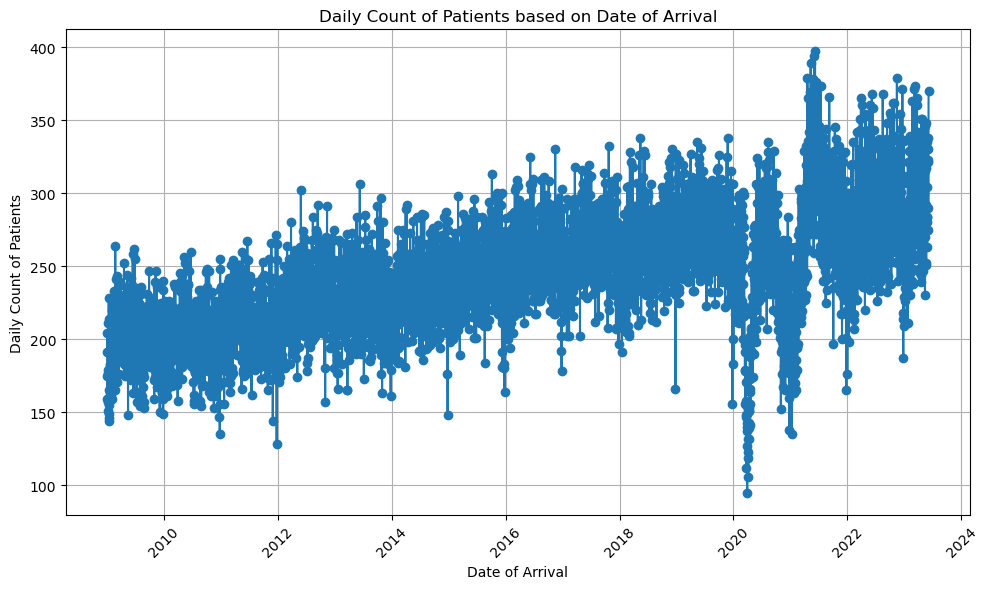

In [12]:
# Group by 'Date of Arrival' and calculate the daily count of patients
daily_patient_count = df.groupby('Arrival Date').size()

# Plot the daily count of patients
plt.figure(figsize=(10, 6))
plt.plot(daily_patient_count.index, daily_patient_count.values, marker='o', linestyle='-')
plt.xlabel('Date of Arrival')
plt.ylabel('Daily Count of Patients')
plt.title('Daily Count of Patients based on Date of Arrival')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Slicing the winter data

In [13]:
# Filter the DataFrame to keep only winter months (October to March)
df_winter = df[df["Arrival Date"].dt.month.isin([10, 11, 12, 1, 2, 3])]

### Data preparation

In [14]:
winter_daily_patient_count = df_winter.groupby("Arrival Date").size()
# Group by 'Arrival Date' and calculate the daily count of patients
winter_daily_patient_count = df_winter.groupby("Arrival Date").size().reset_index(name='Patient Count')

winter_daily_patient_count.set_index("Arrival Date",inplace=True)

In [15]:
winter_daily_patient_count

,Patient Count
Arrival Date,
2009-01-01,191
2009-01-02,204
2009-01-03,175
2009-01-04,159
2009-01-05,179
...,...
2023-03-27,342
2023-03-28,324
2023-03-29,313


In [16]:
# Create a new column 'Day of Week' containing the day of the week for each Arrival Date
winter_daily_patient_count.index.name = "Arrival Date"

winter_daily_patient_count["Day_of_Week"] = winter_daily_patient_count.index.day_name()

# Create a new column 'Month' containing the name of the month for each Arrival Date
winter_daily_patient_count["Month"] = winter_daily_patient_count.index.strftime('%B')

# Create a new column 'COVID Status' indicating whether the year is within the COVID-19 pandemic period
winter_daily_patient_count["COVID_Status"] = winter_daily_patient_count.index.map(lambda x: 'Yes' if 2019 <= x.year <= 2021 else 'No')

def get_season(arrival_date):
    year = arrival_date.year
    if arrival_date.month >= 10:
        season = f"{year} to {year + 1}"
    else:
        season = f"{year - 1} to {year}"
    return season

# Apply the get_season function to the "Arrival Date" column
winter_daily_patient_count["Season"] = winter_daily_patient_count.index.map(get_season)

In [17]:
# Create a new column "Is Weekend" indicating whether the date is a weekend
winter_daily_patient_count["Is Weekend"] = winter_daily_patient_count.index.map(lambda x: x.weekday() >= 5)


In [18]:
winter_daily_patient_count

,Patient Count,Day_of_Week,Month,COVID_Status,Season,Is Weekend
Arrival Date,,,,,,
2009-01-01,191,Thursday,January,No,2008 to 2009,False
2009-01-02,204,Friday,January,No,2008 to 2009,False
2009-01-03,175,Saturday,January,No,2008 to 2009,True
2009-01-04,159,Sunday,January,No,2008 to 2009,True
2009-01-05,179,Monday,January,No,2008 to 2009,False
...,...,...,...,...,...,...
2023-03-27,342,Monday,March,No,2022 to 2023,False
2023-03-28,324,Tuesday,March,No,2022 to 2023,False
2023-03-29,313,Wednesday,March,No,2022 to 2023,False


In [19]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding for 'Day of Week', 'Month', and 'COVID Status'
# You can also use one-hot encoding if you prefer

# Define custom mappings for day of the week and month
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

month_mapping = {
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
}

weekend_mapping = {
    True: 0,
    False: 1
    
}

# Apply the custom mappings to 'Day of Week' and 'Month'
winter_daily_patient_count['Day_of_Week_Encoded'] = winter_daily_patient_count['Day_of_Week'].map(day_mapping)
winter_daily_patient_count['Month_Encoded'] = winter_daily_patient_count['Month'].map(month_mapping)
winter_daily_patient_count['Is_Weekend_Encoded'] = winter_daily_patient_count["Is Weekend"].map(weekend_mapping)

label_encodings = {}

for column in ['COVID_Status']:
    le = LabelEncoder()
    winter_daily_patient_count[column + '_Encoded'] = le.fit_transform(winter_daily_patient_count[column])
    label_encodings[column] = le.classes_

# Print the label encodings for reference
for column, classes in label_encodings.items():
    print(column, ":", classes)
    

COVID_Status : ['No' 'Yes']


In [20]:
# Sample data for the "Season" column
seasons = ['2008 to 2009', '2009 to 2010', '2010 to 2011', '2011 to 2012',
           '2012 to 2013', '2013 to 2014', '2014 to 2015', '2015 to 2016',
           '2016 to 2017', '2017 to 2018', '2018 to 2019', '2019 to 2020',
           '2020 to 2021', '2021 to 2022', '2022 to 2023','2023 to 2024']
# Create a mapping of season labels to numerical values
season_to_num = {season: i for i, season in enumerate(seasons)}


# Apply the mapping to the "Season" column and add a new "Season_Num" column
winter_daily_patient_count["Season_Num"] = winter_daily_patient_count["Season"].map(season_to_num)

In [21]:
winter_daily_patient_count

,Patient Count,Day_of_Week,Month,COVID_Status,Season,Is Weekend,Day_of_Week_Encoded,Month_Encoded,Is_Weekend_Encoded,COVID_Status_Encoded,Season_Num
Arrival Date,,,,,,,,,,,
2009-01-01,191,Thursday,January,No,2008 to 2009,False,4,0,1,0,0
2009-01-02,204,Friday,January,No,2008 to 2009,False,5,0,1,0,0
2009-01-03,175,Saturday,January,No,2008 to 2009,True,6,0,0,0,0
2009-01-04,159,Sunday,January,No,2008 to 2009,True,0,0,0,0,0
2009-01-05,179,Monday,January,No,2008 to 2009,False,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,342,Monday,March,No,2022 to 2023,False,1,2,1,0,14
2023-03-28,324,Tuesday,March,No,2022 to 2023,False,2,2,1,0,14
2023-03-29,313,Wednesday,March,No,2022 to 2023,False,3,2,1,0,14


# Processed data for the model 

In [22]:
sea_df= winter_daily_patient_count[["Patient Count","COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]

ADF Test Results:
ADF Statistic: -2.3986455402989804
p-value: 0.14211905992383816
Critical Values:
1%: -3.4328560253199973
5%: -2.8626471695439784
10%: -2.567359385689561


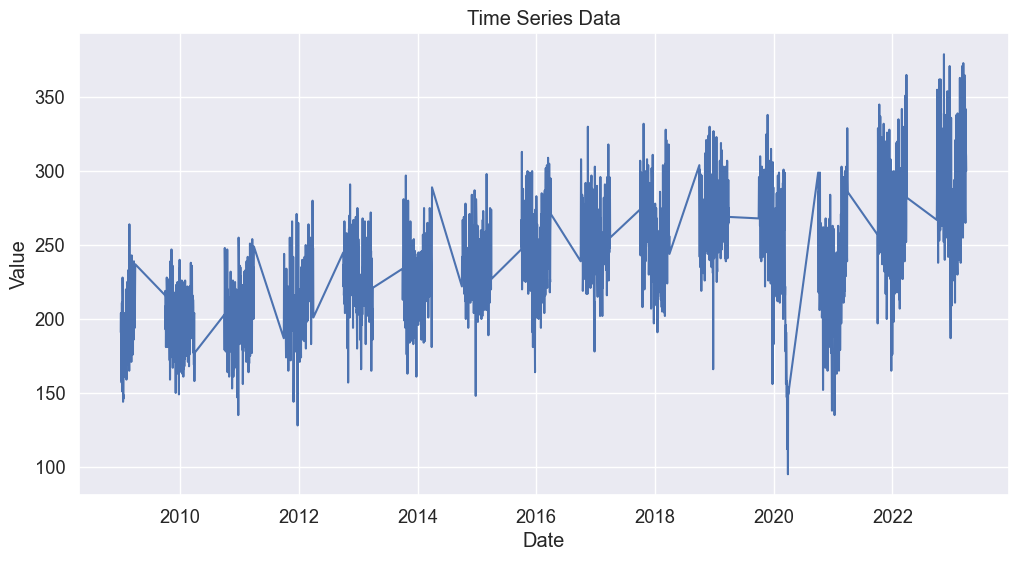

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your time series data (replace 'your_data.csv' with your file)
# For example, you can load data like this:
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Assuming you have a datetime index, you can extract the time series
# Replace 'your_column_name' with the actual column name you want to test
time_series = sea_df["Patient Count"]

# Function to perform ADF test and print results
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Test Results:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Perform ADF test on the time series
adf_test(time_series)

# Plot the time series to visualize it
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# XG boost 

Mean Squared Error (MSE): 555.4093460286535
Mean Absolute Error (MAE): 18.714205710303705
Min Forecasting Error: 0.065032958984375
Max Forecasting Error: 69.01483154296875
Mean Forecasting Error: 18.714205710303705
Standard Deviation: 14.372048207040534
R-squared (R2): 0.6090725448836045
Correlation: 0.7872977074288247


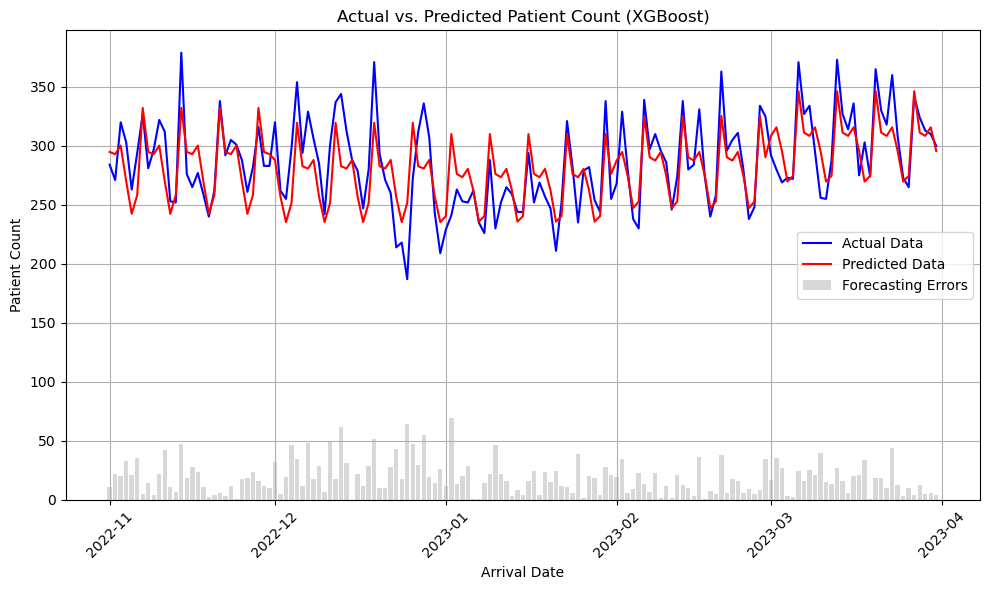

In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Fit an XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (XGBoost)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# ARIMA

Mean Squared Error (MSE): 984.5015567757023
Mean Absolute Error (MAE): 25.666601815996323
Min Forecasting Error: 0.08674943859045925
Max Forecasting Error: 88.71325450666842
Mean Forecasting Error: 25.666601815996323
Standard Deviation: 18.107971229491586
R-squared (R2): 0.30705399377885245
Correlation: 0.6243173977470597


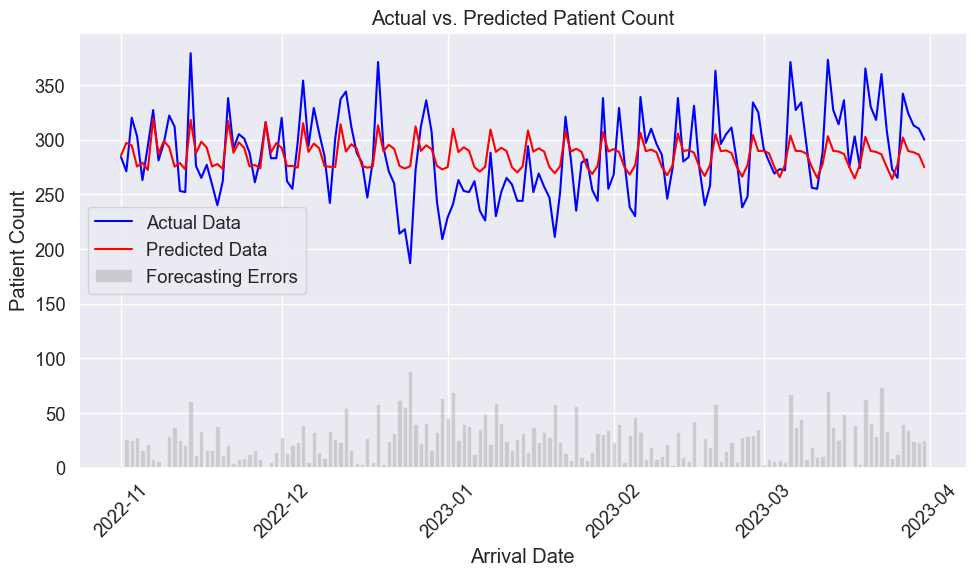

In [179]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Fit an ARIMA model
order = (4, 2, 3)  # Specify the order of the ARIMA model
model = ARIMA(train_data['Patient Count'], order=order, exog=X_train)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=X_test, typ='levels')

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
forecast_error = np.abs(test_data['Patient Count'] - predictions_df['Predicted Patient Count'])
r2 = r2_score(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
correlation = test_data['Patient Count'].corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Patient Count'], label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [180]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "ARIMA",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = pd.DataFrame(model_metrics, index=[0])
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317


# Hyper tuning for ARIMA

In [24]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from itertools import product

# # Load your data and set the index if not done already
# # winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# # Split the data into training and testing sets
# train_start = '2009-01-01'
# train_end = '2022-10-31'
# test_start = '2022-11-01'
# test_end = '2023-03-31'

# train_data = sea_df[train_start:train_end]
# test_data = sea_df[test_start:test_end]

# # Extract features and target variable
# X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
# y_train = train_data['Patient Count']
# X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
# y_test = test_data['Patient Count']

# # Hyperparameter tuning
# best_mse = float('inf')
# best_order = None

# # Define ranges for p, d, and q hyperparameters
# p_values = range(0, 5)
# d_values = range(1, 5)
# q_values = range(0, 5)

# # Iterate over all possible combinations of p, d, and q
# for p, d, q in product(p_values, d_values, q_values):
#     try:
#         model = ARIMA(y_train, exog=X_train, order=(p, d, q))
#         model_fit = model.fit()
        
#         predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test, typ='levels')
#         mse = mean_squared_error(y_test, predictions)
        
#         if mse < best_mse:
#             best_mse = mse
#             best_order = (p, d, q)
#     except:
#         continue

# # Fit the best model
# best_model = ARIMA(y_train, exog=X_train, order=best_order)
# best_model_fit = best_model.fit()

# # Make predictions using the best model
# best_predictions = best_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test, typ='levels')

# # Create a DataFrame for best predictions with the Arrival Date as the index
# prediction_dates = pd.date_range(start=test_start, end=test_end)
# best_predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Best Predicted Patient Count': best_predictions})
# best_predictions_df.set_index('Arrival Date', inplace=True)

# # Calculate metrics for the best model's predictions
# best_mse = mean_squared_error(y_test, best_predictions_df['Best Predicted Patient Count'])
# best_mae = mean_absolute_error(y_test, best_predictions_df['Best Predicted Patient Count'])
# best_forecast_error = np.abs(y_test - best_predictions_df['Best Predicted Patient Count'])
# best_r2 = r2_score(y_test, best_predictions_df['Best Predicted Patient Count'])
# best_correlation = y_test.corr(best_predictions_df['Best Predicted Patient Count'])

# print("Best Model Order (p, d, q):", best_order)
# print("Best Model Mean Squared Error (MSE):", best_mse)
# print("Best Model Mean Absolute Error (MAE):", best_mae)
# print("Best Model R-squared (R2):", best_r2)
# print("Best Model Correlation:", best_correlation) 

# # Best Model Order (p, d, q): (4, 2, 3)
# # Best Model Mean Squared Error (MSE): 1031.3367045571406
# # Best Model Mean Absolute Error (MAE): 26.036321528018792
# # Best Model R-squared (R2): 0.27363349983006935
# # Best Model Correlation: 0.595734551426745

Best Model Order (p, d, q): (4, 2, 3)
Best Model Mean Squared Error (MSE): 1031.3367045571406
Best Model Mean Absolute Error (MAE): 26.036321528018792
Best Model R-squared (R2): 0.27363349983006935
Best Model Correlation: 0.595734551426745


# SARIMA

Mean Squared Error (MSE): 970.4507763254543
Mean Absolute Error (MAE): 25.37235980380843
Min Forecasting Error: 0.2014760362691277
Max Forecasting Error: 88.09588322535899
Mean Forecasting Error: 25.37235980380843
Standard Deviation: 18.134830994717078
R-squared (R2): 0.3169437010426752
Correlation: 0.6154685719013727


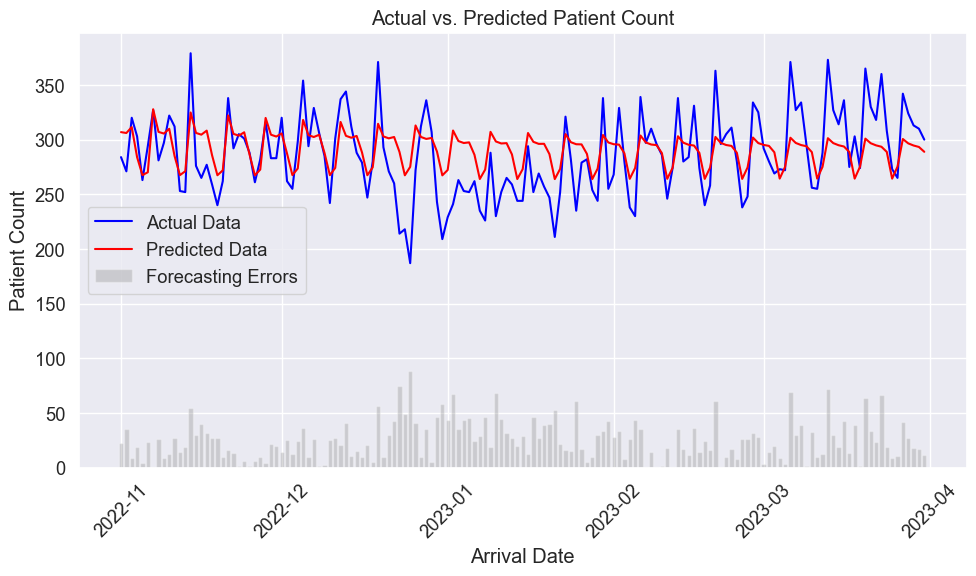

In [181]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']


# Fit the Seasonal AutoRegressive Integrated Moving Average (SARIMA) model
order = (2, 1, 1)           # Order of the non-seasonal part (p, d, q)
seasonal_order = (1, 0, 1, 7)  # Order of the seasonal part (P, D, Q, S)
model = SARIMAX(train_data['Patient Count'], order=order, seasonal_order=seasonal_order,exog=X_train)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=X_test, typ='levels')

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
forecast_error = np.abs(test_data['Patient Count'] - predictions_df['Predicted Patient Count'])
r2 = r2_score(test_data['Patient Count'], predictions_df['Predicted Patient Count'])
correlation = test_data['Patient Count'].corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Patient Count'], label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [182]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "SARIMAX",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469


# Regression 

Mean Squared Error (MSE): 1069.1487178863742
Mean Absolute Error (MAE): 26.594439041927824
Min Forecasting Error: 0.2710749491167235
Max Forecasting Error: 101.82857664973687
Mean Forecasting Error: 26.594439041927824
Standard Deviation: 19.086568404625194
R-squared (R2): 0.24747469517245957
Correlation: 0.5879680956295509


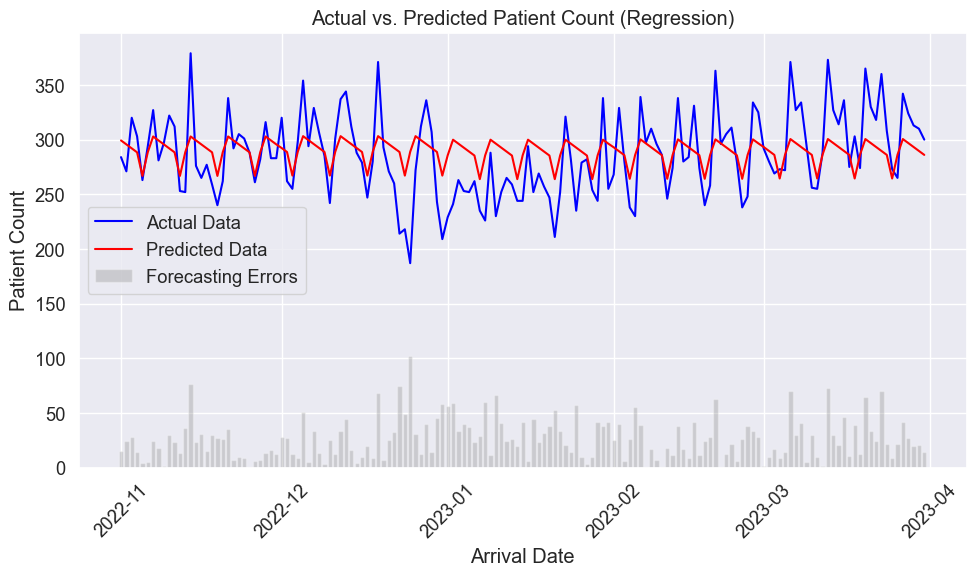

In [183]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [184]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "Simple LR",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
2,Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968


# polynominal regression

Mean Squared Error (MSE): 860.1004708589197
Mean Absolute Error (MAE): 22.702410439616965
Min Forecasting Error: 0.1233801962156349
Max Forecasting Error: 93.17728925659162
Mean Forecasting Error: 22.702410439616965
Standard Deviation: 18.627910187780707
R-squared (R2): 0.39461427752073774
Correlation: 0.6724249987821416


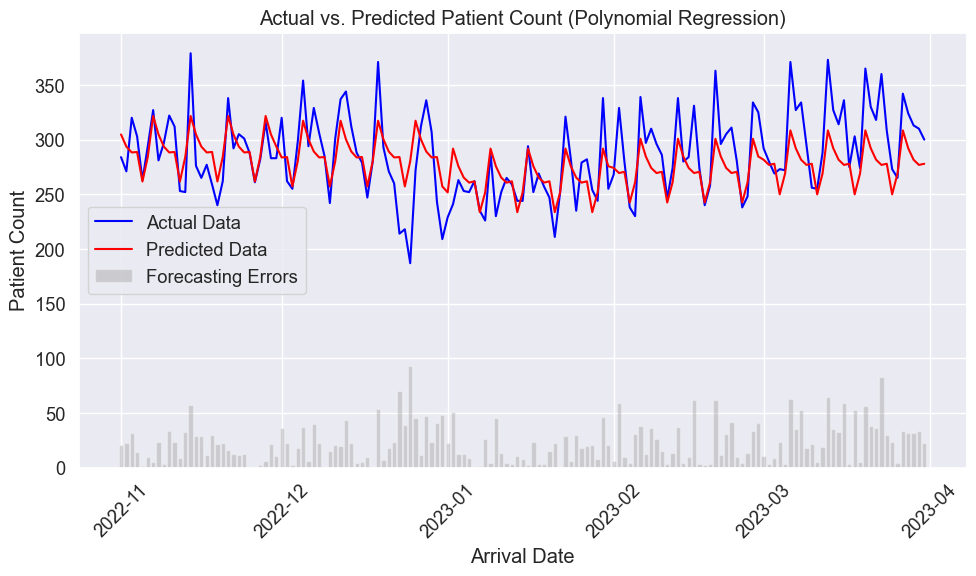

In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1, 10]}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

best_model = grid_search.best_estimator_

# Make predictions using the best model
best_predictions = best_model.predict(X_test_poly)

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': best_predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])  # Calculate correlation

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)  # Print correlation

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [187]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "poly reg",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
2,Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968
3,poly reg,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425


# XGboost

Mean Squared Error (MSE): 555.4093460286535
Mean Absolute Error (MAE): 18.714205710303705
Min Forecasting Error: 0.065032958984375
Max Forecasting Error: 69.01483154296875
Mean Forecasting Error: 18.714205710303705
Standard Deviation: 14.372048207040534
R-squared (R2): 0.6090725448836045
Correlation: 0.7872977074288247


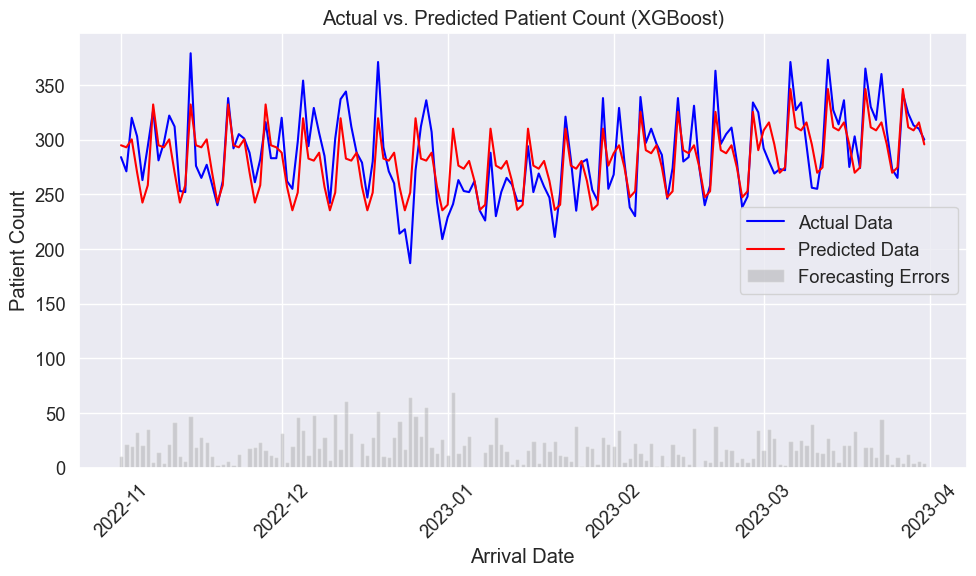

In [188]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Fit an XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (XGBoost)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [189]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "XG Boost",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
2,Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968
3,poly reg,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425
4,XG Boost,555.409346,18.714206,0.065033,69.014832,18.714206,14.372048,0.609073,0.787298


# LSTM

Epoch 1/100
78/78 [==============================] - 2s 2ms/step - loss: 0.0481
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 8/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 9/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 10/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 11/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 12/100
78/78 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 13/100
78/78 [=================

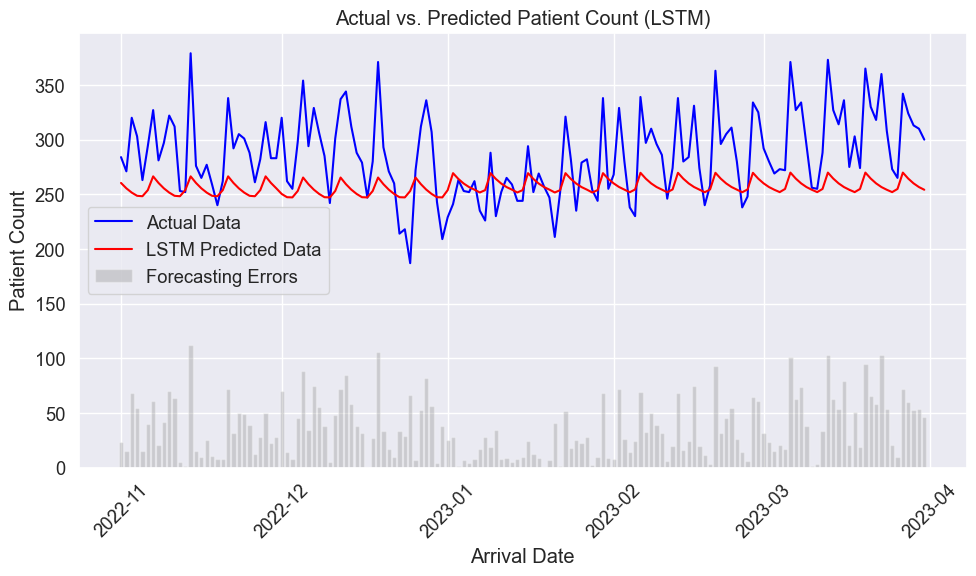

Mean Squared Error (MSE): 2027.0981622806871
Mean Absolute Error (MAE): 35.95584460125853
Min Forecasting Error: 0.148040771484375
Max Forecasting Error: 112.60580444335938
Mean Forecasting Error: 35.95584460125853
Standard Deviation: 27.18769152820396
R-squared (R2): -0.4267824830780369
Correlation: 0.5546429849980006


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from keras.optimizers import Adam

# Load and preprocess your data (assuming you've already loaded your DataFrame)
# winter_daily_patient_count = ...

# Ensure that the DataFrame is sorted chronologically
winter_daily_patient_count.sort_index(inplace=True)

# Define the date range for training and testing
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded", "Month_Encoded", "Day_of_Week_Encoded", "Season_Num", "Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded", "Month_Encoded", "Day_of_Week_Encoded", "Season_Num", "Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])  # Reshape for LSTM
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])  # Reshape for LSTM

# Initialize and build the LSTM model with hyperparameters
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(1))

# Define the optimizer with learning rate
optimizer = Adam(learning_rate=0.001)  # Use learning_rate instead of lr

model.compile(optimizer=optimizer, loss='mse')

# Train the LSTM model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, shuffle=False)


# Forecasting using LSTM model
forecast_scaled = model.predict(X_test_scaled)
forecast = scaler.inverse_transform(forecast_scaled).flatten()
forecast_test_df = pd.DataFrame({'Patient Count': forecast}, index=y_test.index)
# Inverse transform the test data to the original scale
y_test = scaler.inverse_transform(y_test_scaled).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, forecast_test_df['Patient Count'])
mae = mean_absolute_error(y_test, forecast_test_df['Patient Count'])
r2 = r2_score(y_test, forecast_test_df['Patient Count'])
correlation = np.corrcoef(y_test, forecast_test_df['Patient Count'])[0, 1]
forecast_error = np.abs(y_test - forecast_test_df['Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual Data', color='blue')
plt.plot(test_data.index, forecast, label='LSTM Predicted Data', color='red')
plt.bar(test_data.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (LSTM)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)


In [191]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "LSTM",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
2,Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968
3,poly reg,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425
4,XG Boost,555.409346,18.714206,0.065033,69.014832,18.714206,14.372048,0.609073,0.787298
5,LSTM,2027.098162,35.955845,0.148041,112.605804,35.955845,27.187692,-0.426782,0.554643


# Random Forest

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Squared Error (MSE): 726.5448430361395
Mean Absolute Error (MAE): 21.067098871514634
Min Forecasting Error: 0.07281053004331284
Max Forecasting Error: 84.06275151991633
Mean Forecasting Error: 21.067098871514634
Standard Deviation: 16.870299427152823
R-squared (R2): 0.48861802822200606
Correlation: 0.6998080747875908


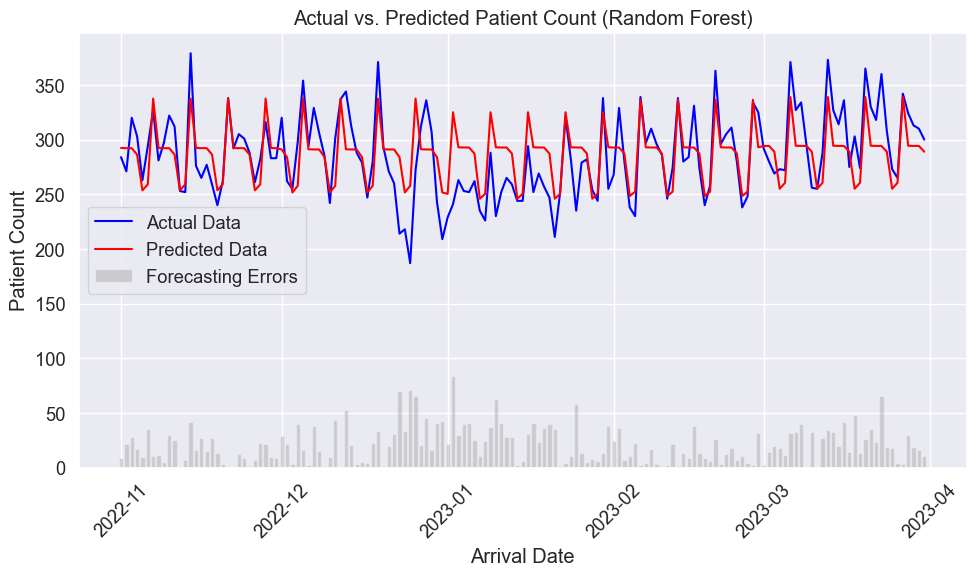

In [192]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Set up parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Initialize Random Forest model
model = RandomForestRegressor()

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = y_test.corr(predictions_df['Predicted Patient Count'])

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Predicted Data', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Predicted Patient Count (Random Forest)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [193]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "Rondam Forest",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
2,Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968
3,poly reg,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425
4,XG Boost,555.409346,18.714206,0.065033,69.014832,18.714206,14.372048,0.609073,0.787298
5,LSTM,2027.098162,35.955845,0.148041,112.605804,35.955845,27.187692,-0.426782,0.554643
6,Rondam Forest,726.544843,21.067099,0.072811,84.062752,21.067099,16.870299,0.488618,0.699808


# Ensempe method 

Mean Squared Error (MSE): 697.4335695319008
Mean Absolute Error (MAE): 21.092830628577012
Min Forecasting Error: 0.04273175015498509
Max Forecasting Error: 66.62274351821361
Mean Forecasting Error: 21.092830628577012
Standard Deviation: 15.943950975530024
R-squared (R2): 0.5091081336687051
Correlation: 0.7795938936050119


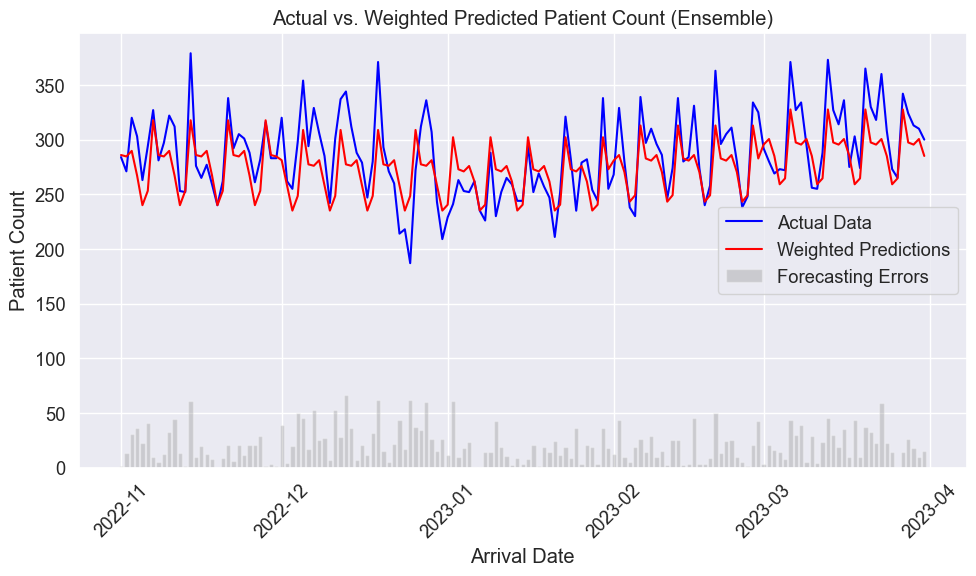

In [194]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Fit an XGBoost model
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgboost_model.fit(X_train, y_train)

# Fit a Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train)

# Make predictions with both models
xgboost_predictions = xgboost_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Define the weights for XGBoost and Random Forest
weight_xgboost = 0.7  # You can adjust this weight
weight_random_forest = 0.3  # You can adjust this weight

# Combine predictions with weights
weighted_predictions = (weight_xgboost * xgboost_predictions) + (weight_random_forest * random_forest_predictions)

# Calculate metrics
mse = mean_squared_error(y_test, weighted_predictions)
mae = mean_absolute_error(y_test, weighted_predictions)
r2 = r2_score(y_test, weighted_predictions)

# Calculate the correlation using NumPy corrcoef
correlation = np.corrcoef(y_test, weighted_predictions)[0, 1]

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - weighted_predictions)
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(test_data.index, weighted_predictions, label='Weighted Predictions', color='red')
plt.bar(test_data.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Weighted Predicted Patient Count (Ensemble)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [195]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "Ensemble XG_70 and RF_30",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,Model,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
0,ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
1,SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
2,Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968
3,poly reg,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425
4,XG Boost,555.409346,18.714206,0.065033,69.014832,18.714206,14.372048,0.609073,0.787298
5,LSTM,2027.098162,35.955845,0.148041,112.605804,35.955845,27.187692,-0.426782,0.554643
6,Rondam Forest,726.544843,21.067099,0.072811,84.062752,21.067099,16.870299,0.488618,0.699808
7,Ensemble XG_70 and RF_30,697.433570,21.092831,0.042732,66.622744,21.092831,15.943951,0.509108,0.779594


Mean Squared Error (MSE): 712.80918897143
Mean Absolute Error (MAE): 21.268886010800163
Min Forecasting Error: 0.045266774392445086
Max Forecasting Error: 67.59384805544948
Mean Forecasting Error: 21.268886010800163
Standard Deviation: 16.191972332297656
R-squared (R2): 0.49828593231161245
Correlation: 0.7753624584942266


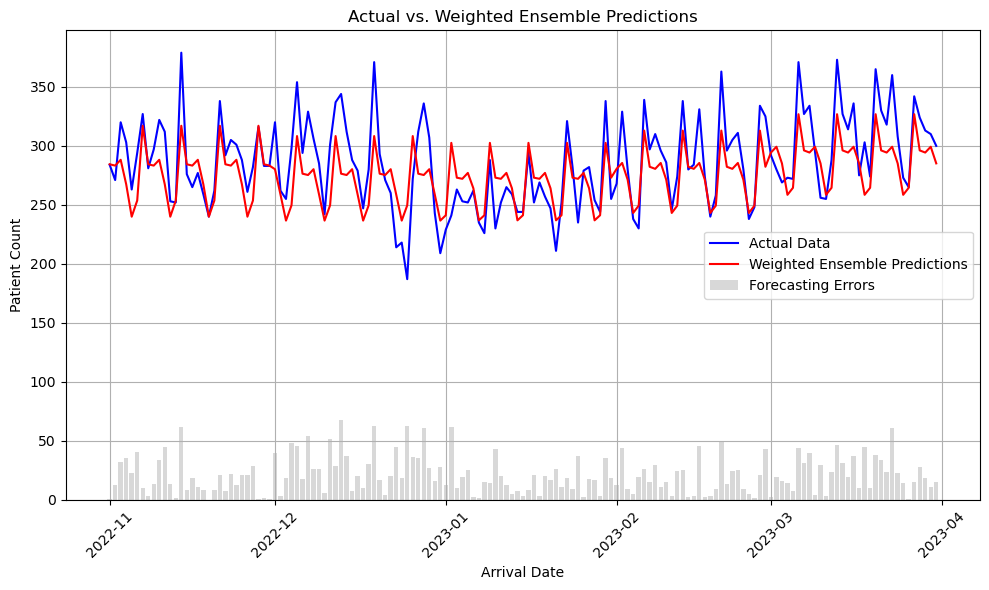

In [34]:
# import pandas as pd
# import numpy as np
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt

# # Load your data and set the index if not done already
# # winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# # Split the data into training and testing sets
# train_start = '2009-01-01'
# train_end = '2022-10-31'
# test_start = '2022-11-01'
# test_end = '2023-03-31'

# train_data = sea_df[train_start:train_end]
# test_data = sea_df[test_start:test_end]

# # Extract features and target variable
# X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
# y_train = train_data['Patient Count']
# X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
# y_test = test_data['Patient Count']

# # Create individual models
# xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
# rf_model = RandomForestRegressor(n_estimators=100, max_depth=3)
# gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# # Fit individual models
# xgb_model.fit(X_train, y_train)
# rf_model.fit(X_train, y_train)
# gb_model.fit(X_train, y_train)

# # Make predictions with individual models
# xgb_predictions = xgb_model.predict(X_test)
# rf_predictions = rf_model.predict(X_test)
# gb_predictions = gb_model.predict(X_test)

# # Create a weighted ensemble of predictions
# weighted_predictions = (0.4 * xgb_predictions) + (0.3 * rf_predictions) + (0.3 * gb_predictions)

# # Calculate metrics for the ensemble model
# mse = mean_squared_error(y_test, weighted_predictions)
# mae = mean_absolute_error(y_test, weighted_predictions)
# r2 = r2_score(y_test, weighted_predictions)
# correlation = np.corrcoef(y_test, weighted_predictions)[0, 1]

# # Calculate statistics of forecasting error
# forecast_error = np.abs(y_test - weighted_predictions)
# min_error = forecast_error.min()
# max_error = forecast_error.max()
# mean_error = forecast_error.mean()
# std_deviation = forecast_error.std()

# print("Mean Squared Error (MSE):", mse)
# print("Mean Absolute Error (MAE):", mae)
# print("Min Forecasting Error:", min_error)
# print("Max Forecasting Error:", max_error)
# print("Mean Forecasting Error:", mean_error)
# print("Standard Deviation:", std_deviation)
# print("R-squared (R2):", r2)
# print("Correlation:", correlation)

# # Plot actual data and predicted data
# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
# plt.plot(X_test.index, weighted_predictions, label='Weighted Ensemble Predictions', color='red')
# plt.bar(X_test.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
# plt.xlabel('Arrival Date')
# plt.ylabel('Patient Count')
# plt.title('Actual vs. Weighted Ensemble Predictions')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()
# Mean Squared Error (MSE): 712.80918897143
# Mean Absolute Error (MAE): 21.268886010800163
# Min Forecasting Error: 0.045266774392445086
# Max Forecasting Error: 67.59384805544948
# Mean Forecasting Error: 21.268886010800163
# Standard Deviation: 16.191972332297656
# R-squared (R2): 0.49828593231161245
# Correlation: 0.7753624584942266

Mean Squared Error (MSE): 647.6216856987003
Mean Absolute Error (MAE): 19.985394856491343
Min Forecasting Error: 0.04922750006772958
Max Forecasting Error: 83.28001430711362
Mean Forecasting Error: 19.985394856491343
Standard Deviation: 15.806972595968164
R-squared (R2): 0.5441684601120813
Correlation: 0.7731744092792451


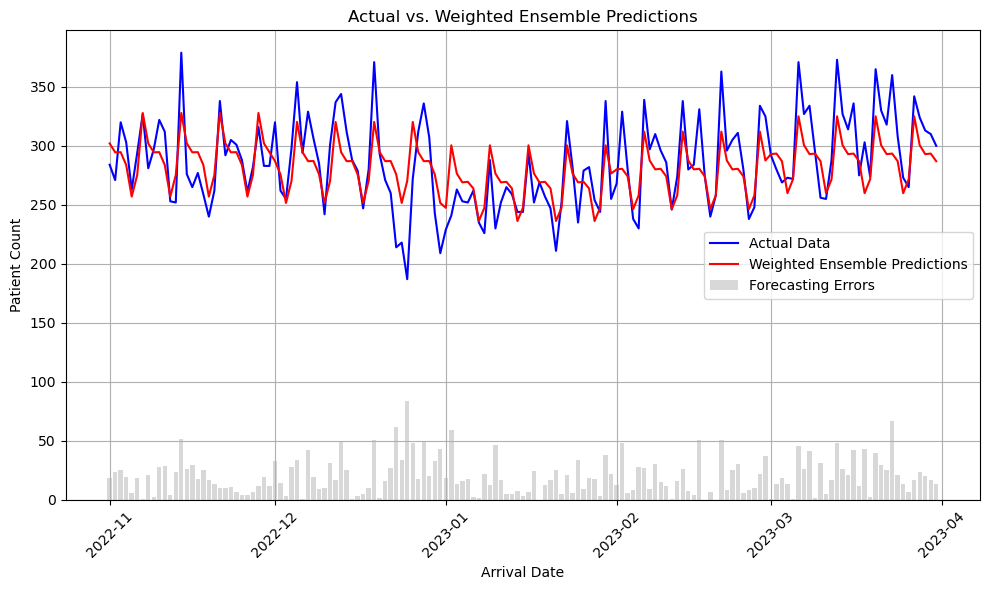

In [168]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import Ridge
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import matplotlib.pyplot as plt

# # Load your data and set the index if not done already
# # winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# # Split the data into training and testing sets
# train_start = '2009-01-01'
# train_end = '2022-10-31'
# test_start = '2022-11-01'
# test_end = '2023-03-31'

# train_data = sea_df[train_start:train_end]
# test_data = sea_df[test_start:test_end]

# # Extract features and target variable
# X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
# y_train = train_data['Patient Count']
# X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
# y_test = test_data['Patient Count']

# # Apply Polynomial Features
# poly = PolynomialFeatures(degree=2)  # You can adjust the degree
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Fit Polynomial Regression
# poly_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
# poly_model.fit(X_train_poly, y_train)

# # Make predictions using Polynomial Regression
# poly_predictions = poly_model.predict(X_test_poly)

# # Fit an XGBoost model
# xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
# xgb_model.fit(X_train, y_train)

# # Make predictions using XGBoost
# xgb_predictions = xgb_model.predict(X_test)

# # Create a weighted ensemble of predictions
# weighted_predictions = (0.6 * poly_predictions) + (0.4 * xgb_predictions)

# # Create a DataFrame for predictions with the Arrival Date as the index
# prediction_dates = pd.date_range(start=test_start, end=test_end)
# predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': weighted_predictions})
# predictions_df.set_index('Arrival Date', inplace=True)

# # Calculate metrics for the ensemble model
# mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
# mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
# r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
# correlation = np.corrcoef(y_test, predictions_df['Predicted Patient Count'])[0, 1]

# # Calculate statistics of forecasting error
# forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
# min_error = forecast_error.min()
# max_error = forecast_error.max()
# mean_error = forecast_error.mean()
# std_deviation = forecast_error.std()

# print("Mean Squared Error (MSE):", mse)
# print("Mean Absolute Error (MAE):", mae)
# print("Min Forecasting Error:", min_error)
# print("Max Forecasting Error:", max_error)
# print("Mean Forecasting Error:", mean_error)
# print("Standard Deviation:", std_deviation)
# print("R-squared (R2):", r2)
# print("Correlation:", correlation)

# # Plot actual data and predicted data
# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
# plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Weighted Ensemble Predictions', color='red')
# plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
# plt.xlabel('Arrival Date')
# plt.ylabel('Patient Count')
# plt.title('Actual vs. Weighted Ensemble Predictions')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()

# Mean Squared Error (MSE): 647.6216856987003
# Mean Absolute Error (MAE): 19.985394856491343
# Min Forecasting Error: 0.04922750006772958
# Max Forecasting Error: 83.28001430711362
# Mean Forecasting Error: 19.985394856491343
# Standard Deviation: 15.806972595968164
# R-squared (R2): 0.5441684601120813
# Correlation: 0.7731744092792451

Mean Squared Error (MSE): 589.8130748538886
Mean Absolute Error (MAE): 19.278841545161725
Min Forecasting Error: 0.34583727721081914
Max Forecasting Error: 77.05791745637003
Mean Forecasting Error: 19.278841545161725
Standard Deviation: 14.818691096741226
R-squared (R2): 0.5848573201087051
Correlation: 0.7916836135609827


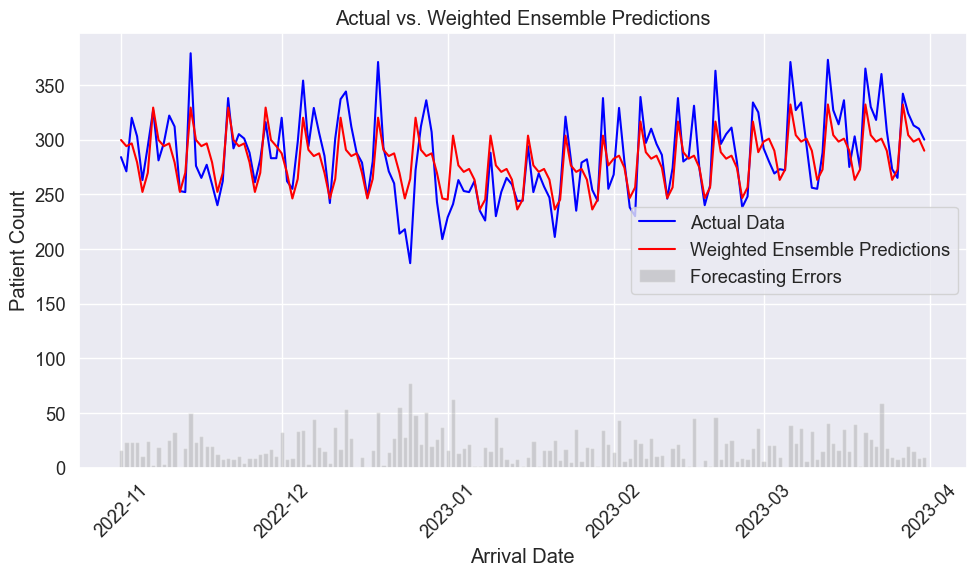

In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'
test_start = '2022-11-01'
test_end = '2023-03-31'

train_data = sea_df[train_start:train_end]
test_data = sea_df[test_start:test_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data['Patient Count']
X_test = test_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_test = test_data['Patient Count']

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Polynomial Regression
poly_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
poly_model.fit(X_train_poly, y_train)

# Make predictions using Polynomial Regression
poly_predictions = poly_model.predict(X_test_poly)

# Fit an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Make predictions using XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Create a weighted ensemble of predictions (60% weight for XGBoost)
weighted_predictions = (0.4 * poly_predictions) + (0.6 * xgb_predictions)

# Create a DataFrame for predictions with the Arrival Date as the index
prediction_dates = pd.date_range(start=test_start, end=test_end)
predictions_df = pd.DataFrame({'Arrival Date': prediction_dates, 'Predicted Patient Count': weighted_predictions})
predictions_df.set_index('Arrival Date', inplace=True)

# Calculate metrics for the ensemble model
mse = mean_squared_error(y_test, predictions_df['Predicted Patient Count'])
mae = mean_absolute_error(y_test, predictions_df['Predicted Patient Count'])
r2 = r2_score(y_test, predictions_df['Predicted Patient Count'])
correlation = np.corrcoef(y_test, predictions_df['Predicted Patient Count'])[0, 1]

# Calculate statistics of forecasting error
forecast_error = np.abs(y_test - predictions_df['Predicted Patient Count'])
min_error = forecast_error.min()
max_error = forecast_error.max()
mean_error = forecast_error.mean()
std_deviation = forecast_error.std()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Min Forecasting Error:", min_error)
print("Max Forecasting Error:", max_error)
print("Mean Forecasting Error:", mean_error)
print("Standard Deviation:", std_deviation)
print("R-squared (R2):", r2)
print("Correlation:", correlation)

# Plot actual data and predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Data', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted Patient Count'], label='Weighted Ensemble Predictions', color='red')
plt.bar(predictions_df.index, forecast_error, label='Forecasting Errors', alpha=0.3, color='gray')
plt.xlabel('Arrival Date')
plt.ylabel('Patient Count')
plt.title('Actual vs. Weighted Ensemble Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [201]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'Min Error', 'Max Error', 'Mean Error', 'Std Deviation', 'R2', 'Correlation'])

# Create a dictionary with the model name and metrics
model_metrics = {
    'Model': "Ensemble XG_60 and poly_40",
    'MSE': mse,
    'MAE': mae,
    'Min Error': min_error,
    'Max Error': max_error,
    'Mean Error': mean_error,
    'Std Deviation': std_deviation,
    'R2': r2,
    'Correlation': correlation
}

# Append the model metrics to the DataFrame
model_metrics_df = model_metrics_df.append(model_metrics,ignore_index=True)
model_metrics_df

,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation,Model
0,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317,NaN
1,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469,NaN
2,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968,NaN
3,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425,NaN
4,555.409346,18.714206,0.065033,69.014832,18.714206,14.372048,0.609073,0.787298,NaN
5,2027.098162,35.955845,0.148041,112.605804,35.955845,27.187692,-0.426782,0.554643,NaN
6,726.544843,21.067099,0.072811,84.062752,21.067099,16.870299,0.488618,0.699808,NaN
7,697.433570,21.092831,0.042732,66.622744,21.092831,15.943951,0.509108,0.779594,NaN
8,589.813075,19.278842,0.345837,77.057917,19.278842,14.818691,0.584857,0.791684,NaN
9,589.813075,19.278842,0.345837,77.057917,19.278842,14.818691,0.584857,0.791684,Ensemble XG_60 and poly_40


In [233]:
model_metrics_df_1.iloc[:,0:8]

,MSE,MAE,Min Error,Max Error,Mean Error,Std Deviation,R2,Correlation
Model,,,,,,,,
XG Boost,555.409346,18.714206,0.065033,69.014832,18.714206,14.372048,0.609073,0.787298
Ensemble XG_60 and poly_40,589.813075,19.278842,0.345837,77.057917,19.278842,14.818691,0.584857,0.791684
Ensemble XG_70 and RF_30,697.433570,21.092831,0.042732,66.622744,21.092831,15.943951,0.509108,0.779594
Rondam Forest,726.544843,21.067099,0.072811,84.062752,21.067099,16.870299,0.488618,0.699808
poly reg,860.100471,22.702410,0.123380,93.177289,22.702410,18.627910,0.394614,0.672425
SARIMAX,970.450776,25.372360,0.201476,88.095883,25.372360,18.134831,0.316944,0.615469
ARIMA,984.501557,25.666602,0.086749,88.713255,25.666602,18.107971,0.307054,0.624317
Simple LR,1069.148718,26.594439,0.271075,101.828577,26.594439,19.086568,0.247475,0.587968
LSTM,2027.098162,35.955845,0.148041,112.605804,35.955845,27.187692,-0.426782,0.554643


In [223]:
model_metrics_df = model_metrics_df_1

In [212]:
# Assuming model_metrics_df contains your data

# Calculate ranks for each metric (lower is better for MSE, MAE, Min Error, and Std Deviation,
# higher is better for R2 and Correlation)
model_metrics_df['MSE Rank'] = model_metrics_df['MSE'].rank(ascending=True)
model_metrics_df['MAE Rank'] = model_metrics_df['MAE'].rank(ascending=True)
model_metrics_df['Min Error Rank'] = model_metrics_df['Min Error'].rank(ascending=True)
model_metrics_df['Max Error Rank'] = model_metrics_df['Max Error'].rank(ascending=True)
model_metrics_df['Std Deviation Rank'] = model_metrics_df['Std Deviation'].rank(ascending=True)
model_metrics_df['R2 Rank'] = model_metrics_df['R2'].rank(ascending=False)
model_metrics_df['Correlation Rank'] = model_metrics_df['Correlation'].rank(ascending=False)

# Calculate an overall rank based on your chosen metrics (you can adjust the weights)
model_metrics_df['Overall Rank'] = (
    0.15 * model_metrics_df['MSE Rank'] +
    0.15 * model_metrics_df['MAE Rank'] +
    0.1 * model_metrics_df['Min Error Rank'] +
    0.1 * model_metrics_df['Max Error Rank'] +
    0.1 * model_metrics_df['Std Deviation Rank'] +
    0.15 * model_metrics_df['R2 Rank'] +
    0.15 * model_metrics_df['Correlation Rank']
)

# Sort the DataFrame by the overall rank to find the best model
model_metrics_df.sort_values(by='Overall Rank', inplace=True)

# Sig Test 

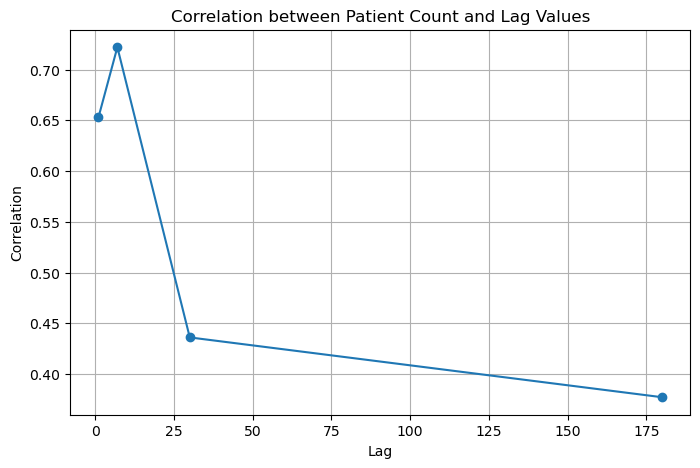

Lag value with highest correlation: 7


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data and set the index if not done already
# winter_daily_patient_count = ...

# Calculate correlations for different lag values
lag_values = [1, 7, 30, 180]
correlations = []

for lag in lag_values:
    shifted_data = winter_daily_patient_count[['Patient Count', 'COVID_Status_Encoded', 'Month_Encoded', 'Day_of_Week_Encoded', 'Season_Num', 'Is_Weekend_Encoded']].shift(lag)
    correlation = winter_daily_patient_count[['Patient Count', 'COVID_Status_Encoded', 'Month_Encoded', 'Day_of_Week_Encoded', 'Season_Num', 'Is_Weekend_Encoded']].corrwith(shifted_data)['Patient Count']
    correlations.append(correlation)

# Create a DataFrame to hold lag values and correlations
correlation_df = pd.DataFrame({'Lag': lag_values, 'Correlation': correlations})

# Plot the correlations
plt.figure(figsize=(8, 5))
plt.plot(correlation_df['Lag'], correlation_df['Correlation'], marker='o')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Correlation between Patient Count and Lag Values')
plt.grid(True)
plt.show()

# Find the lag value with the highest correlation
max_correlation_lag = correlation_df.loc[correlation_df['Correlation'].idxmax(), 'Lag']
print("Lag value with highest correlation:", max_correlation_lag)

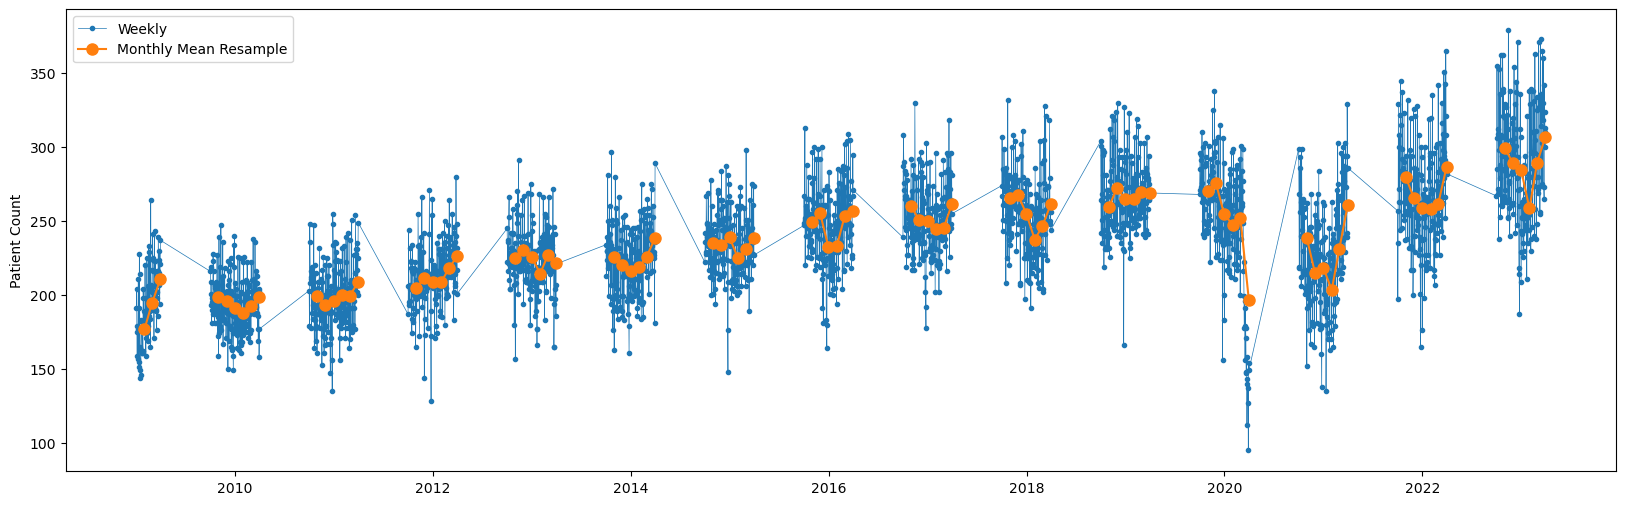

In [40]:
import warnings
import matplotlib.pyplot as plt
y = winter_daily_patient_count['Patient Count']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Patient Count')
ax.legend();

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load your data and set the index if not done already
# winter_daily_patient_count = pd.read_csv('your_data.csv', index_col='Arrival Date')

# Split the data into training and testing sets
train_start = '2009-01-01'
train_end = '2022-10-31'

train_data = sea_df[train_start:train_end]

# Extract features and target variable
X_train = train_data[["COVID_Status_Encoded","Month_Encoded","Day_of_Week_Encoded","Season_Num","Is_Weekend_Encoded"]]
y_train = train_data["Patient Count"]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Access feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3            Season_Num    0.620349
2   Day_of_Week_Encoded    0.168034
1         Month_Encoded    0.144156
4    Is_Weekend_Encoded    0.060543
0  COVID_Status_Encoded    0.006918


Explained Variance Ratio: [0.32657547 0.20032132]


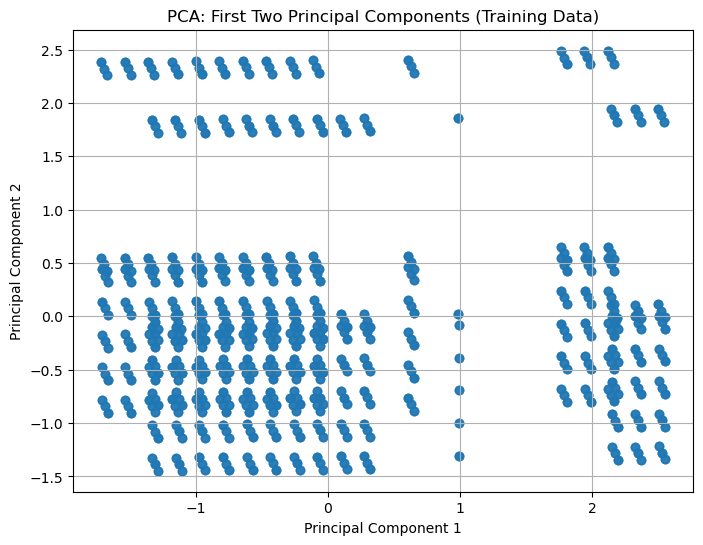

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the feature data (important for PCA)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

# Initialize PCA with the number of components you want to keep (e.g., 2 for visualization)
pca = PCA(n_components=2)

# Fit PCA to the scaled training data
pca.fit(scaled_X_train)

# Transform the training data into the first two principal components
pca_components_train = pca.transform(scaled_X_train)

# Create a DataFrame with the principal components
pca_df_train = pd.DataFrame(data=pca_components_train, columns=['PC1', 'PC2'])

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_train['PC1'], pca_df_train['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components (Training Data)')
plt.grid(True)
plt.show()


In [234]:
# Get the loadings of the original variables on the first two principal components
loadings = pca.components_[:2]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=X_train.columns, index=['PC1', 'PC2'])

# Display the loadings
print("Loadings of Original Variables on PC1 and PC2:")
print(loadings_df)

Loadings of Original Variables on PC1 and PC2:
     COVID_Status_Encoded  Month_Encoded  Day_of_Week_Encoded  Season_Num  \
PC1              0.700600       0.103646            -0.000230    0.705985   
PC2              0.035837      -0.276119             0.612255    0.006460   

     Is_Weekend_Encoded  
PC1            0.001228  
PC2           -0.739984  
